In [66]:
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon

from h3 import h3

In [57]:
hex_id = h3.geo_to_h3(40, -80, 2) # lat, lng, hex resolution                                                                                                        
hex_id

'822a87fffffffff'

In [58]:
hex_center_coordinates = h3.h3_to_geo(hex_id) # array of [lat, lng]                                                                                                                  
hex_center_coordinates


[39.61149810217661, -80.20788131368657]

In [61]:
hex_boundary = h3.h3_to_geo_boundary(hex_id) # array of arrays of [lat, lng]                                                                                                                                                                                                                                                         
hex_boundary = hex_boundary+[hex_boundary[0]]
hex_boundary = [[h[1], h[0]] for h in hex_boundary]
hex_boundary


[[-79.73406932047651, 41.163833989516235],
 [-81.86750279548116, 40.67424641607381],
 [-82.26705878743626, 39.12545066120517],
 [-80.65177495480032, 38.0892982161225],
 [-78.61941821988545, 38.540002057010945],
 [-78.10427143231793, 40.06406043200122],
 [-79.73406932047651, 41.163833989516235]]

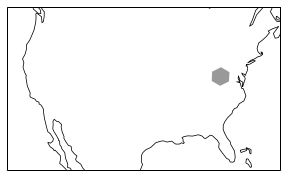

In [62]:

# make the map
bounds = [-122., -72., 25., 50.]

plt.figure(figsize=(5, 3))

ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent(bounds, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.75)

pgon = Polygon(hex_boundary)
ax.add_geometries([pgon], crs=ccrs.PlateCarree(), facecolor='0.5', 
                  edgecolor=None, alpha=0.8)

plt.show()

In [72]:
hres = 8
geoJson = {'type': 'Polygon',
 'coordinates': [[[37.813318999983238, -122.4089866999972145], 
                  [ 37.7866302000007224, -122.3805436999997056 ], 
                  [37.7198061999978478, -122.3544736999993603], 
                  [ 37.7076131999975672, -122.5123436999983966 ], 
                  [37.7835871999971715, -122.5247187000021967],  
                  [37.8151571999998453, -122.4798767000009008]]] }
hex_ids = list(h3.polyfill(geoJson, hres))


In [89]:
#hex_ids
#pd.DataFrame([hex_ids, [h3.h3_to_geo(h)[0] for h in hex_ids]], columns=['id', 'lat'])
df = pd.DataFrame({'hex_id': hex_ids, 
                   'lat': [h3.h3_to_geo(h)[0] for h in hex_ids],
                   'lon': [h3.h3_to_geo(h)[1] for h in hex_ids]})
df.head()

,hex_id,lat,lon
0,882830874bfffff,37.789671,-122.478930
1,8828308239fffff,37.746692,-122.371035
2,8828309511fffff,37.725142,-122.464555
3,8828308219fffff,37.733672,-122.394853
4,88283095edfffff,37.741617,-122.458515


In [104]:
import matplotlib as mpl
import matplotlib.cm as cm

def id_to_bdy(hex_id):
    hex_boundary = h3.h3_to_geo_boundary(hex_id) # array of arrays of [lat, lng]                                                                                                                                                                                                                                                         
    hex_boundary = hex_boundary+[hex_boundary[0]]
    return [[h[1], h[0]] for h in hex_boundary]

def plot_h3(df):
    
    # will be options
    bounds = [-122.6, -122.3, 37.7, 37.8]
    cmap = cm.hot

    ckey = 'lat'
    vmin = df[ckey].min()
    vmax = df[ckey].max()
    #
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)

    plt.figure(figsize=(5, 3))

    ax = plt.axes(projection=ccrs.LambertConformal())
    ax.set_extent(bounds, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.75)

    for index, row in df.iterrows():
        pgon = Polygon(id_to_bdy(row['hex_id']))
        ax.add_geometries([pgon], crs=ccrs.PlateCarree(),
                          facecolor=m.to_rgba(row[ckey]),
                          edgecolor=None, alpha=0.8)

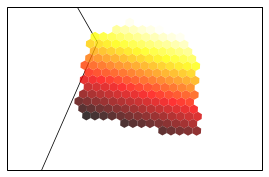

In [105]:
plot_h3(df)